In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

C:\Users\91813\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Loading training dataset

In [2]:
data = pd.read_csv("loan_train.csv")

In [3]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


## Loading testing dataset

In [4]:
df = pd.read_csv("loan_test.csv")

In [5]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


# 3.1). Missing value and outlier treatment


## Preprocessing Training Dataset

In [6]:
data.shape

(614, 13)

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
for cat in data.columns:
    if data[cat].isnull().sum() > 0:
        print(f"\033[1m{cat}:\033[0m", data[cat].unique())

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Self_Employed: ['No' 'Yes' nan]
LoanAmount: [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 16

### Missing value- In case of GENDER, MARRIED, DEPENDENTS, SELF-EMPLOYED, LOAN AMOUNT TERM, CREDIT HISTORY are all CATEGORICAL variable with typically limited distinct values, using the most frequent value (mode) is appropriate.

In [9]:
mode_imputer = SimpleImputer(strategy='most_frequent')
columns_to_impute = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

for column in columns_to_impute:
    data[[column]] = mode_imputer.fit_transform(data[[column]])

print(data[columns_to_impute].head())

  Gender Married Dependents Self_Employed  Loan_Amount_Term  Credit_History
0   Male      No          0            No             360.0             1.0
1   Male     Yes          1            No             360.0             1.0
2   Male     Yes          0           Yes             360.0             1.0
3   Male     Yes          0            No             360.0             1.0
4   Male      No          0            No             360.0             1.0


In [10]:
print(data[columns_to_impute].info())
print(data[columns_to_impute].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Self_Employed     614 non-null    object 
 4   Loan_Amount_Term  614 non-null    float64
 5   Credit_History    614 non-null    float64
dtypes: float64(2), object(4)
memory usage: 28.9+ KB
None
Gender              0
Married             0
Dependents          0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
dtype: int64


### LOAN AMOUNT is a continuous numerical variable. The median is less sensitive to outliers compared to the mean, making it a better choice.

In [11]:
median_imputer = SimpleImputer(strategy='median')

data['LoanAmount'] = median_imputer.fit_transform(data[['LoanAmount']])

In [12]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Creating a new column TotalIncome by adding ApplicantIncome & CoapplicantIncome

In [14]:
data['TotalIncome'] = data["ApplicantIncome"] + data["CoapplicantIncome"]

### Dropping irrelevant columns

In [15]:
data = data.drop(columns=['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'])

In [16]:
applicant_income_index = data.columns.get_loc('LoanAmount') - 1

# Reorder the columns
columns = data.columns.tolist()
columns.insert(applicant_income_index, columns.pop(columns.index('TotalIncome')))
data = data[columns]
data.head(5)

,Gender,Married,Dependents,Education,TotalIncome,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,5849.0,No,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,6091.0,No,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,3000.0,Yes,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,4941.0,No,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,6000.0,No,141.0,360.0,1.0,Urban,Y


In [17]:
for cat in data.columns:
    unique_count = data[cat].nunique()
    print(f"\033[1m{cat}:\033[0m", unique_count)

Gender: 2
Married: 2
Dependents: 4
Education: 2
TotalIncome: 554
Self_Employed: 2
LoanAmount: 203
Loan_Amount_Term: 10
Credit_History: 2
Property_Area: 3
Loan_Status: 2


### Encoding CATEGORICAL variables
### 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', and 'Loan_Status' are ordinal in nature, Label Encoding might be appropriate.

In [18]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Married'] = label_encoder.fit_transform(data['Married'])
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Self_Employed'] = label_encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = label_encoder.fit_transform(data['Property_Area'])
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])

### Univariate analysis will help us understand the distribution of individual variables   

In [19]:
data.head(5)

,Gender,Married,Dependents,Education,TotalIncome,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849.0,0,128.0,360.0,1.0,2,1
1,1,1,1,0,6091.0,0,128.0,360.0,1.0,0,0
2,1,1,0,0,3000.0,1,66.0,360.0,1.0,2,1
3,1,1,0,1,4941.0,0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000.0,0,141.0,360.0,1.0,2,1


C:\Users\91813\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91813\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91813\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91813\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

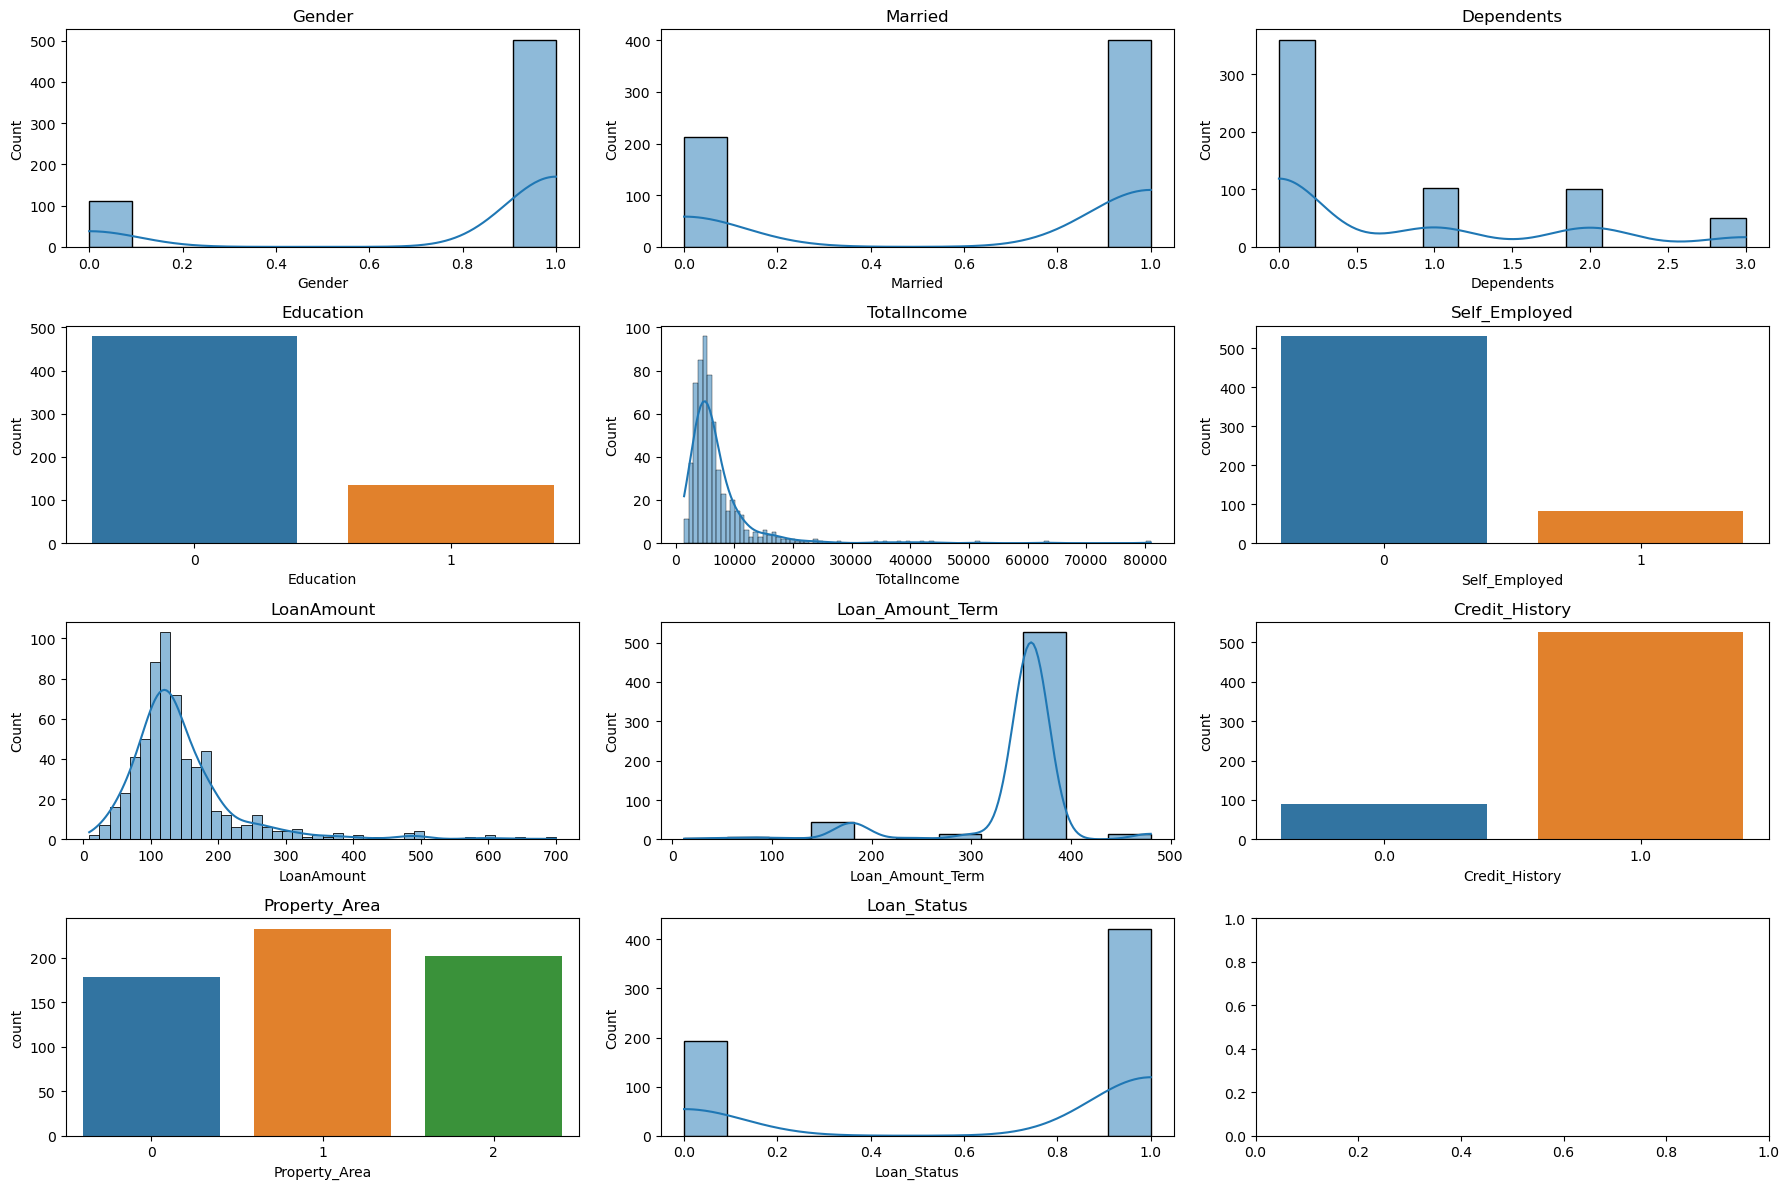

In [20]:
# Univariate analysis (histograms for numerical variables and bar plots for categorical variables)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    if data[column].dtype == 'object' or column == 'Property_Area' or column == 'Education' or column == 'Self_Employed' or column == 'Credit_History':
        sns.countplot(x=column, data=data, ax=axes[i])
    else:
        sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

### Bivariate analysis will explore the relationship between pairs of variables.

#### Scatter Plots: For numerical variables vs. 'Loan_Status'.
#### Bar Plots: For categorical variables vs. 'Loan_Status', showing the count or mean of 'Loan_Status'.

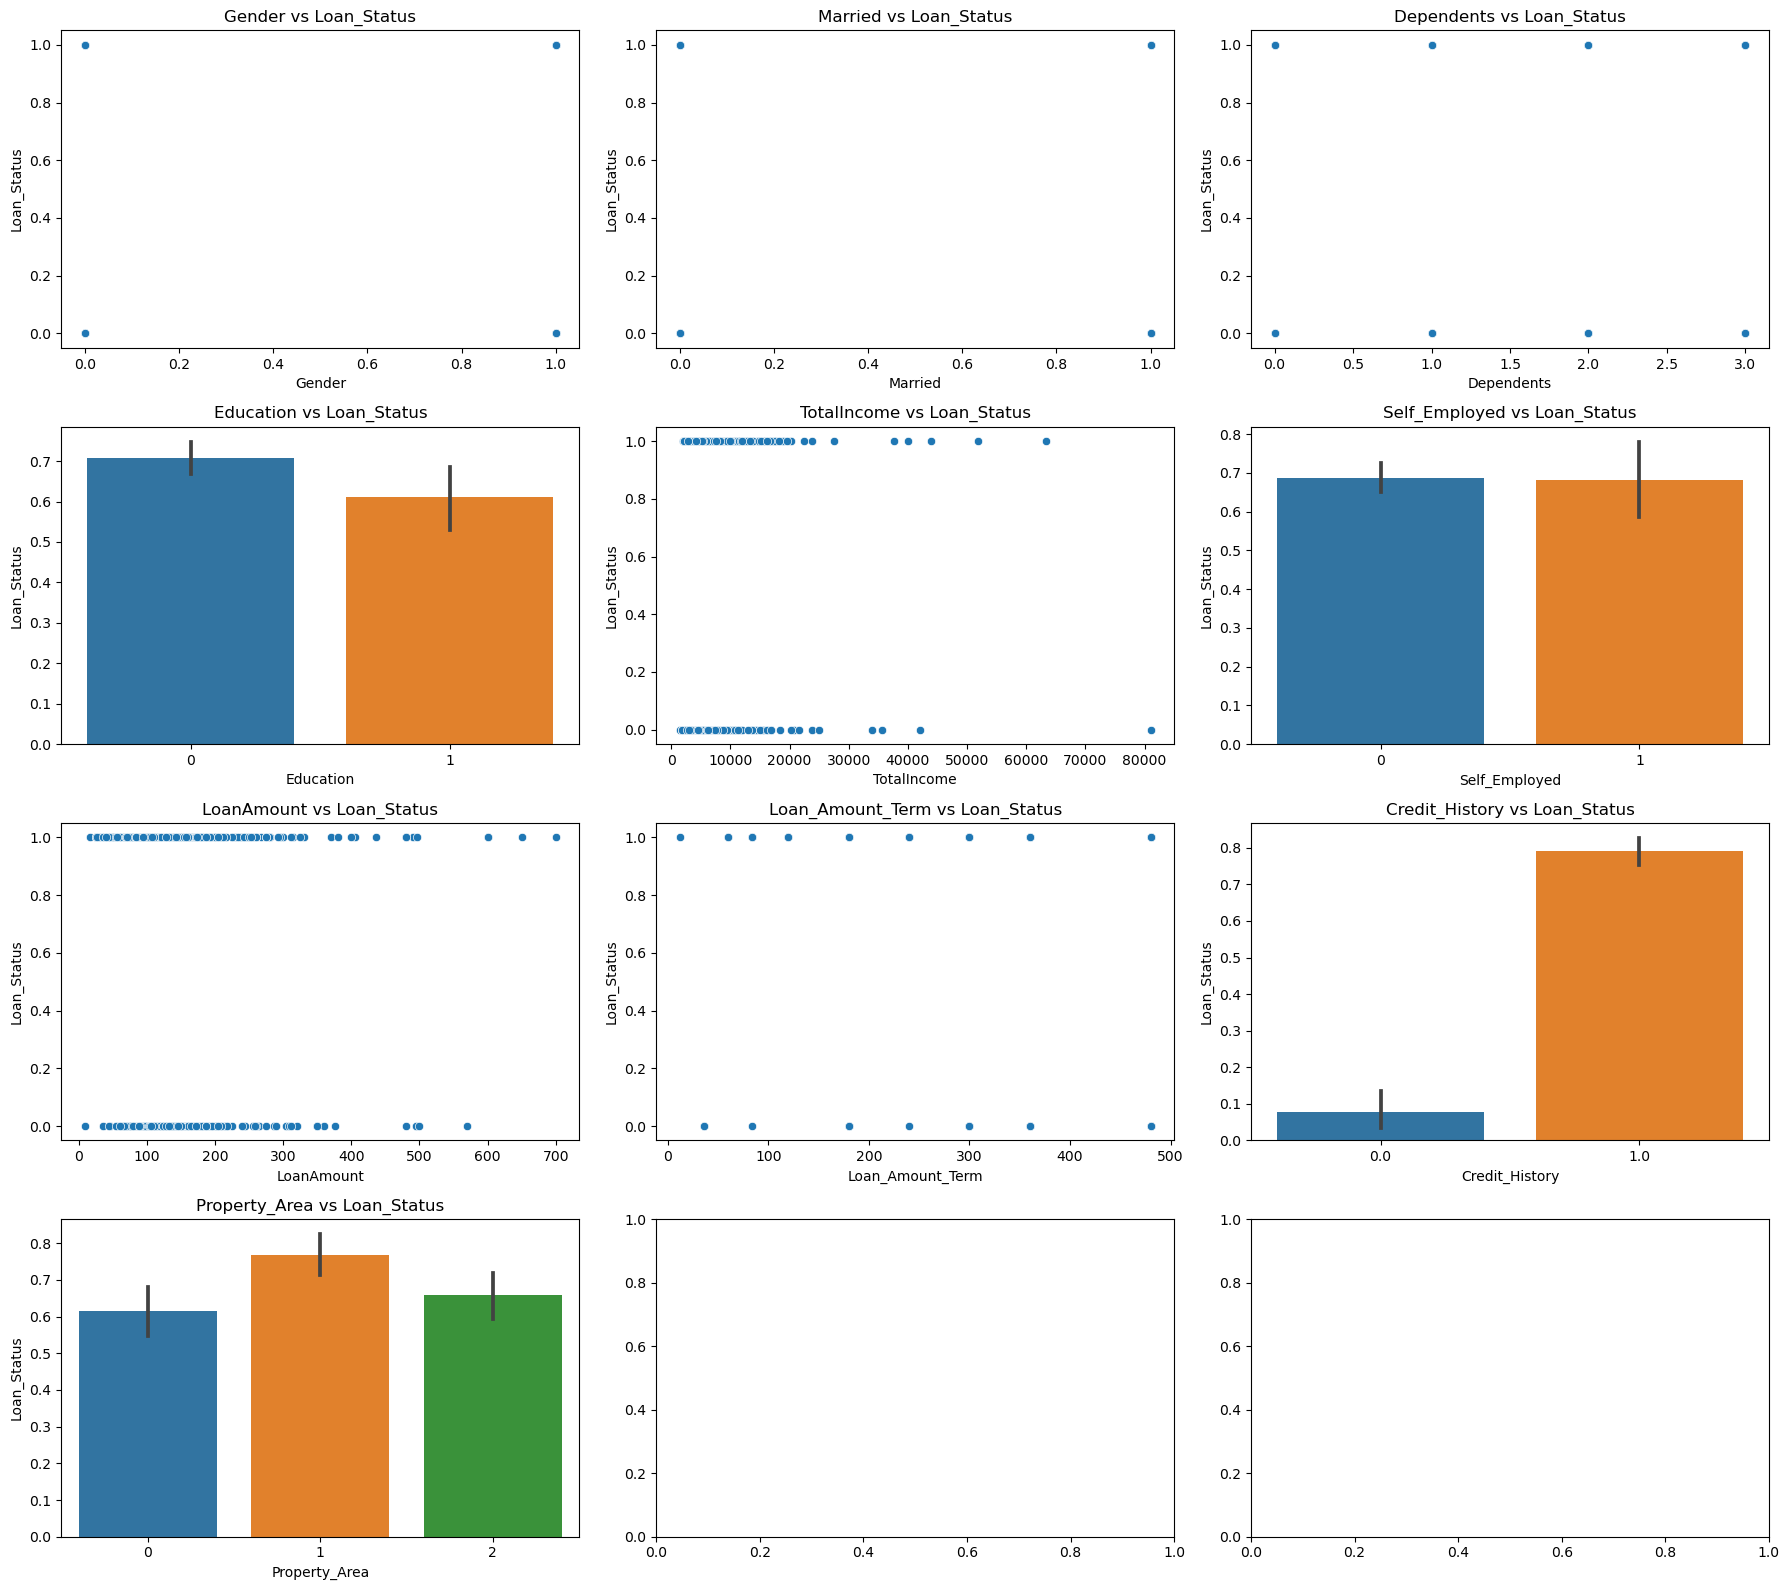

In [21]:
# Bivariate analysis (scatter plots for numerical vs numerical variables, bar plots for categorical vs numerical variables)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.flatten()

# Iterate over columns to create appropriate plots
for i, column in enumerate(data.columns):
    if column != 'Loan_Status':
        if data[column].dtype != 'object' and column not in ['Property_Area', 'Education', 'Self_Employed', 'Credit_History']:
            sns.scatterplot(x=column, y='Loan_Status', data=data, ax=axes[i])
        else:
            sns.barplot(x=column, y='Loan_Status', data=data, ax=axes[i], estimator=lambda x: sum(x == 1) / len(x))
        axes[i].set_title(f'{column} vs Loan_Status')

plt.tight_layout()
plt.show()

## Outlier Analysis
### 1). Univariate Outlier treatment using IQR

In [22]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] > upper_bound, upper_bound,
                          np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

# Apply outlier treatment
data = cap_outliers(data, 'TotalIncome')
data = cap_outliers(data, 'LoanAmount')

### 2). Bivariate Outlier treatment 

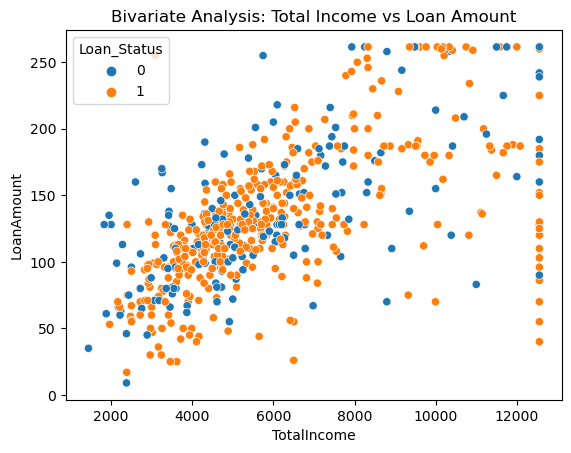

In [23]:
sns.scatterplot(x='TotalIncome', y='LoanAmount', hue='Loan_Status', data=data)
plt.title('Bivariate Analysis: Total Income vs Loan Amount')
plt.show()

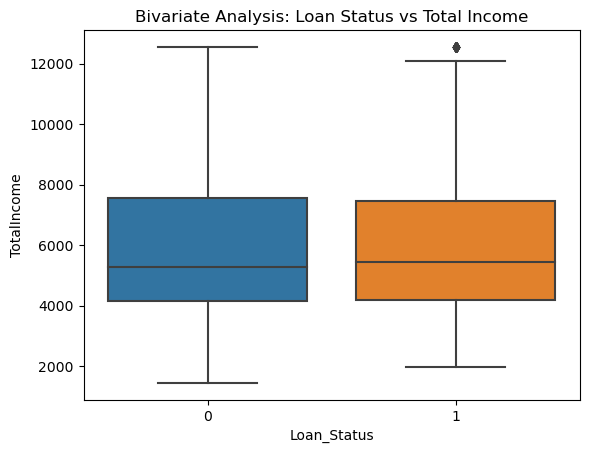

In [24]:
sns.boxplot(x='Loan_Status', y='TotalIncome', data=data)
plt.title('Bivariate Analysis: Loan Status vs Total Income')
plt.show()

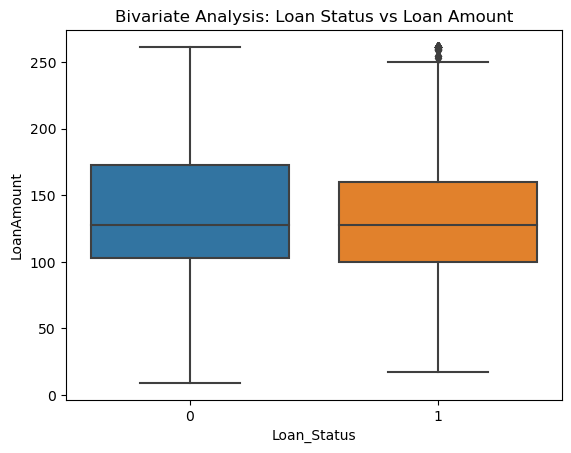

In [25]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=data)
plt.title('Bivariate Analysis: Loan Status vs Loan Amount')
plt.show()

# 3.2). Correlation study: Heat map
## Computing correlation between each pair of features using the Pearson correlation coefficient and visualize using Heatmaps

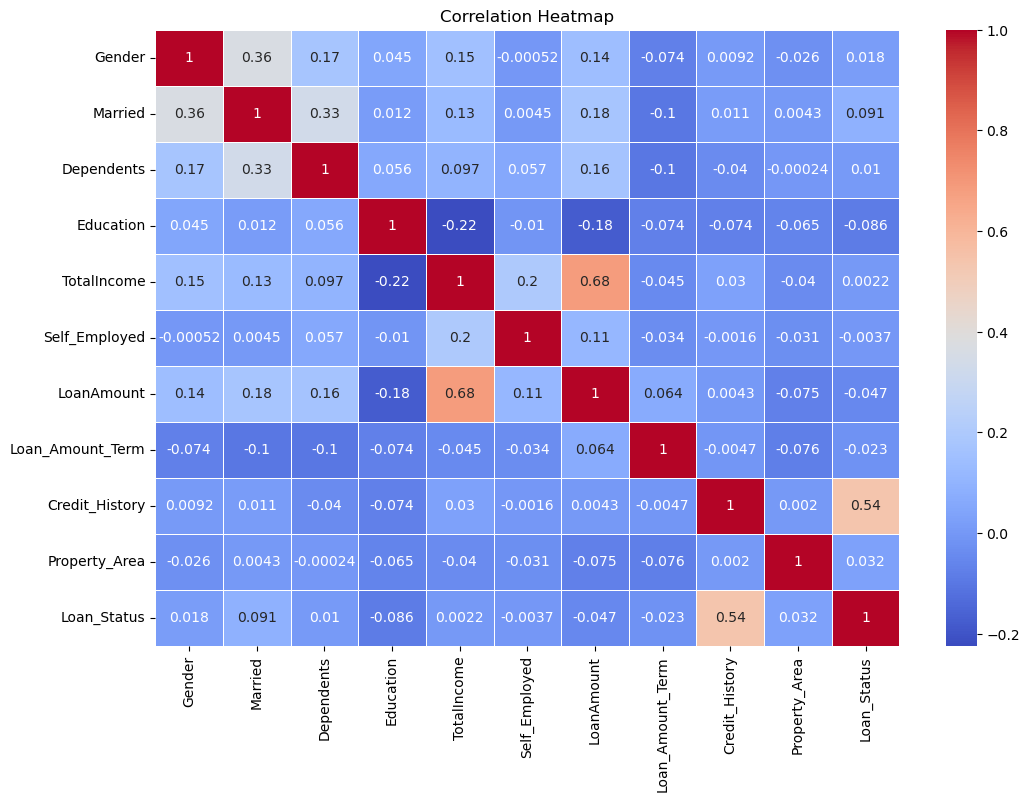

In [26]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Preprocessing Testing Dataset

In [27]:
df.shape

(367, 12)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int32  
 1   Married           614 non-null    int32  
 2   Dependents        614 non-null    int32  
 3   Education         614 non-null    int32  
 4   TotalIncome       614 non-null    float64
 5   Self_Employed     614 non-null    int32  
 6   LoanAmount        614 non-null    float64
 7   Loan_Amount_Term  614 non-null    float64
 8   Credit_History    614 non-null    float64
 9   Property_Area     614 non-null    int32  
 10  Loan_Status       614 non-null    int32  
dtypes: float64(4), int32(7)
memory usage: 36.1 KB


In [29]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Missing value- In case of GENDER, DEPENDENTS, SELF-EMPLOYED, LOAN AMOUNT TERM, CREDIT HISTORY are all CATEGORICAL variable with typically limited distinct values, using the most frequent value (mode) is appropriate.

In [30]:
mode_imputer = SimpleImputer(strategy='most_frequent')
columns_to_impute = ['Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

for column in columns_to_impute:
    df[[column]] = mode_imputer.fit_transform(df[[column]])

print(df[columns_to_impute].head())

  Gender Dependents Self_Employed  Loan_Amount_Term  Credit_History
0   Male          0            No             360.0             1.0
1   Male          1            No             360.0             1.0
2   Male          2            No             360.0             1.0
3   Male          2            No             360.0             1.0
4   Male          0            No             360.0             1.0


In [31]:
print(df[columns_to_impute].info())
print(df[columns_to_impute].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            367 non-null    object 
 1   Dependents        367 non-null    object 
 2   Self_Employed     367 non-null    object 
 3   Loan_Amount_Term  367 non-null    float64
 4   Credit_History    367 non-null    float64
dtypes: float64(2), object(3)
memory usage: 14.5+ KB
None
Gender              0
Dependents          0
Self_Employed       0
Loan_Amount_Term    0
Credit_History      0
dtype: int64


### LOAN AMOUNT is a continuous numerical variable. The median is less sensitive to outliers compared to the mean, making it a better choice.

In [32]:
median_imputer = SimpleImputer(strategy='median')

df['LoanAmount'] = median_imputer.fit_transform(df[['LoanAmount']])

In [33]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [34]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Adding Applicant Income and Coapplicant Income into one column TotalIncome and removing unecessary columns

In [35]:
df['TotalIncome'] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df = df.drop(columns=['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'])

In [36]:
applicant_income_index = df.columns.get_loc('LoanAmount') - 1

# Reorder the columns
columns = df.columns.tolist()
columns.insert(applicant_income_index, columns.pop(columns.index('TotalIncome')))
df = df[columns]
df.head(2)

,Gender,Married,Dependents,Education,TotalIncome,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,5720,No,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,4576,No,126.0,360.0,1.0,Urban


In [37]:
for cat in df.columns:
    unique_count = df[cat].nunique()
    print(f"\033[1m{cat}:\033[0m", unique_count)

Gender: 2
Married: 2
Dependents: 4
Education: 2
TotalIncome: 348
Self_Employed: 2
LoanAmount: 144
Loan_Amount_Term: 12
Credit_History: 2
Property_Area: 3


### Encoding CATEGORICAL variables
### 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area' are ordinal in nature, Label Encoding might be appropriate.

In [38]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])

In [39]:
print(data.isnull().sum())
print(df.isnull().sum())

Gender              0
Married             0
Dependents          0
Education           0
TotalIncome         0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64
Gender              0
Married             0
Dependents          0
Education           0
TotalIncome         0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
dtype: int64


# 3.3). Splitting the training dataset into features(x) & labels(y)

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.decomposition import PCA

# Feature Engineering: This step involves creating new features or modifying existing ones to improve the model’s performance. Following has been implemented:
## - Handling missing values.
## - Encoding categorical variables.
## - Creating new features from existing ones (e.g., Total_Income).
## - Normalizing or scaling features.
## - Reducing dimensionality (e.g., PCA).

In [41]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [42]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X)
X_test_poly = poly.fit_transform(df)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [44]:
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 4). Model Building 1
## Using Grid Search CV to find best model
### implemented RandomizedSearchCV, and applied PCA for dimensionality reduction

In [45]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['lbfgs', 'liblinear'],
            'multi_class': ['auto']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30, 40],
            'min_samples_split': [2, 5, 10, 15]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7, 9]
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance']
        }
    }
}

## considering all features/columns

In [46]:
best_models = []
for model_name, mp in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    if model_name == 'Support Vector Machine':
        # Use RandomizedSearchCV for SVM to speed up the process
        clf = RandomizedSearchCV(mp['model'], mp['params'], n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    else:
        clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train_pca, y)
    
    print(f"Best parameters for {model_name}: {clf.best_params_}")
    print(f"Best cross-validation score for {model_name}: {clf.best_score_}")
    
    best_models.append({
        'model': model_name,
        'best_params': clf.best_params_,
        'best_score': clf.best_score_,
        'estimator': clf.best_estimator_
    })

Running GridSearchCV for Logistic Regression...


C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters for Logistic Regression: {'C': 0.01, 'multi_class': 'auto', 'solver': 'lbfgs'}
Best cross-validation score for Logistic Regression: 0.809462881514061
Running GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.7980807676929229
Running GridSearchCV for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation score for Gradient Boosting: 0.7980141276822604
Running GridSearchCV for Support Vector Machine...
Best parameters for Support Vector Machine: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.01}
Best cross-validation score for Support Vector Machine: 0.809462881514061
Running GridSearchCV for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score for K-Nearest Neighbors: 0.785045

In [47]:
best_model = max(best_models, key=lambda x: x['best_score'])

print("Best Model:")
print(best_model['model'])
print("Best Parameters:")
print(best_model['best_params'])
print("Best Cross-Validation Score:")
print(best_model['best_score'])

Best Model:
Logistic Regression
Best Parameters:
{'C': 0.01, 'multi_class': 'auto', 'solver': 'lbfgs'}
Best Cross-Validation Score:
0.809462881514061


# 4.1). Score & Truth Table of Model 1

C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio


Model: Logistic Regression
Accuracy: 0.8094462540716613
Confusion Matrix:
[[ 82 110]
 [  7 415]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



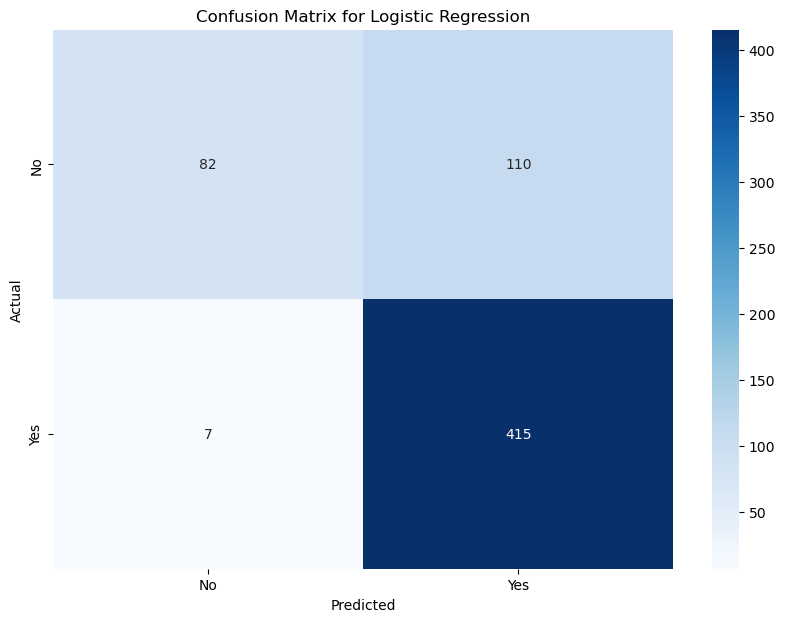


Model: Random Forest
Accuracy: 0.7964169381107492
Confusion Matrix:
[[ 91 101]
 [ 24 398]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.47      0.59       192
           1       0.80      0.94      0.86       422

    accuracy                           0.80       614
   macro avg       0.79      0.71      0.73       614
weighted avg       0.80      0.80      0.78       614



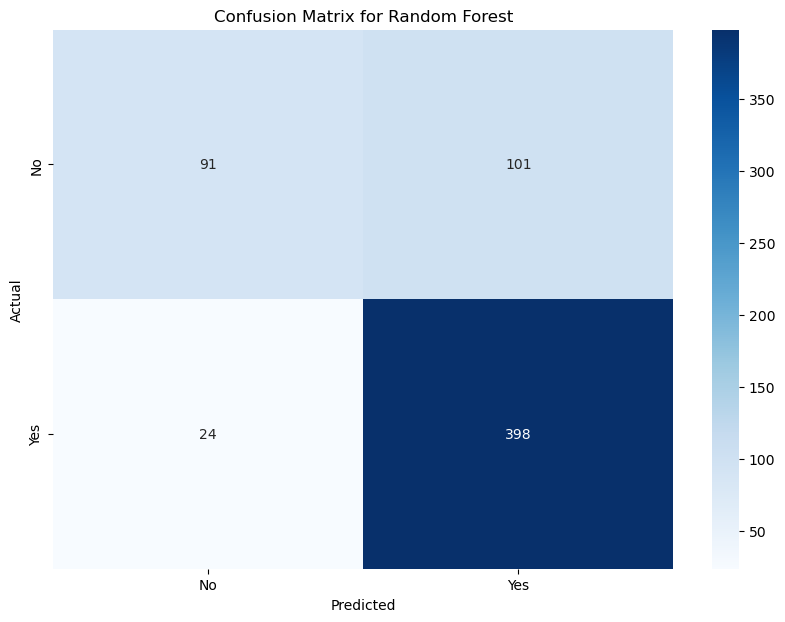


Model: Gradient Boosting
Accuracy: 0.7980456026058632
Confusion Matrix:
[[ 82 110]
 [ 14 408]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.43      0.57       192
           1       0.79      0.97      0.87       422

    accuracy                           0.80       614
   macro avg       0.82      0.70      0.72       614
weighted avg       0.81      0.80      0.77       614



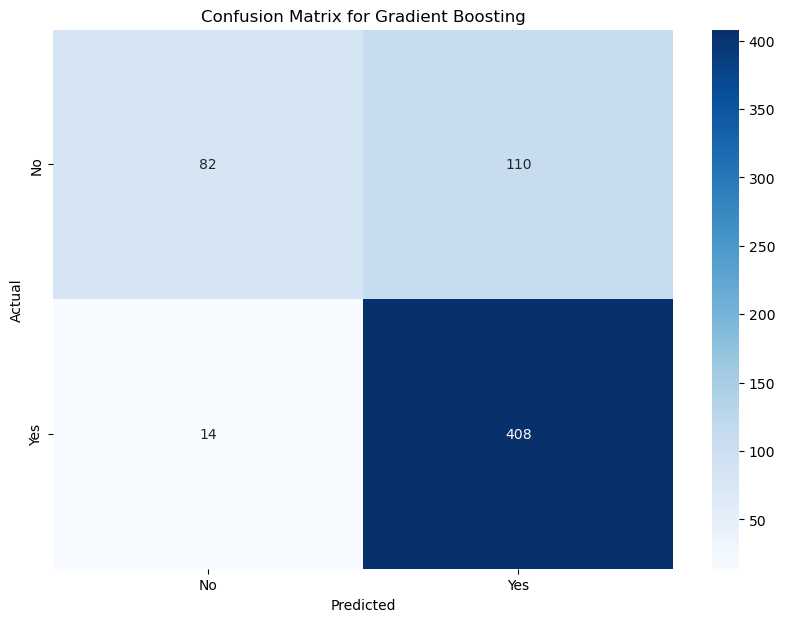


Model: Support Vector Machine
Accuracy: 0.8094462540716613
Confusion Matrix:
[[ 82 110]
 [  7 415]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



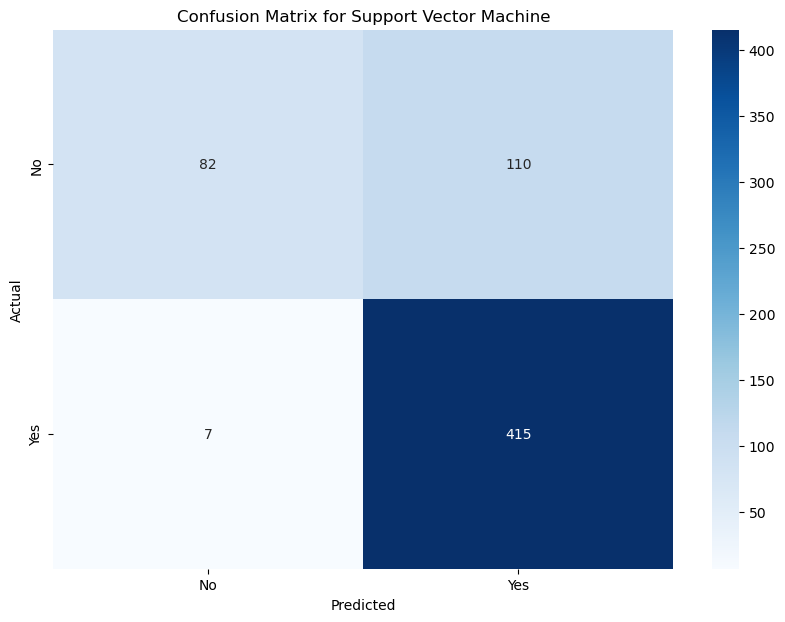


Model: K-Nearest Neighbors
Accuracy: 0.7850162866449512
Confusion Matrix:
[[ 74 118]
 [ 14 408]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.39      0.53       192
           1       0.78      0.97      0.86       422

    accuracy                           0.79       614
   macro avg       0.81      0.68      0.69       614
weighted avg       0.80      0.79      0.76       614



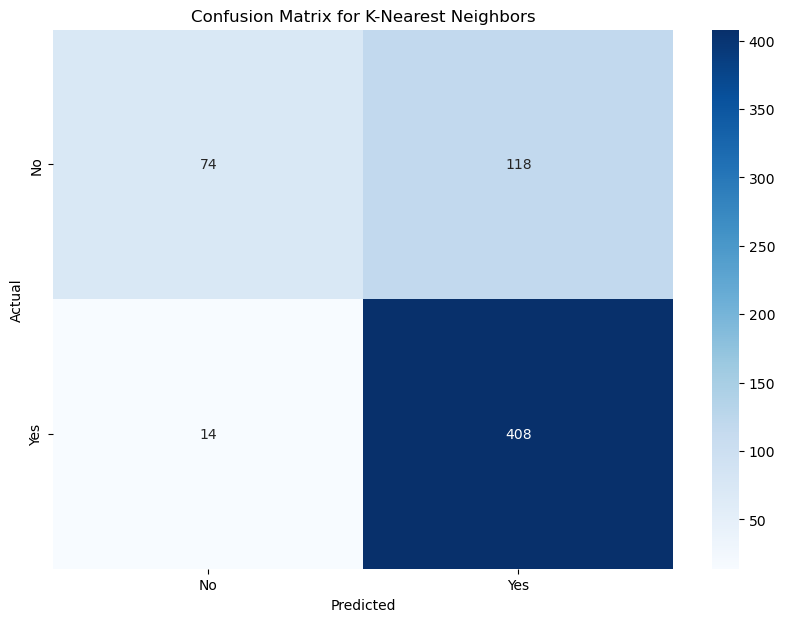

In [48]:
for model_info in best_models:
    model = model_info['estimator']
    model_name = model_info['model']
    
    # Use cross_val_predict to get predictions
    y_train_pred = cross_val_predict(model, X_train_pca, y, cv=5)
    
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y, y_train_pred)}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y, y_train_pred)
    print(f"Confusion Matrix:\n{conf_matrix}")
    
    # Classification Report
    class_report = classification_report(y, y_train_pred)
    print(f"Classification Report:\n{class_report}")
    
    # Visualize Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

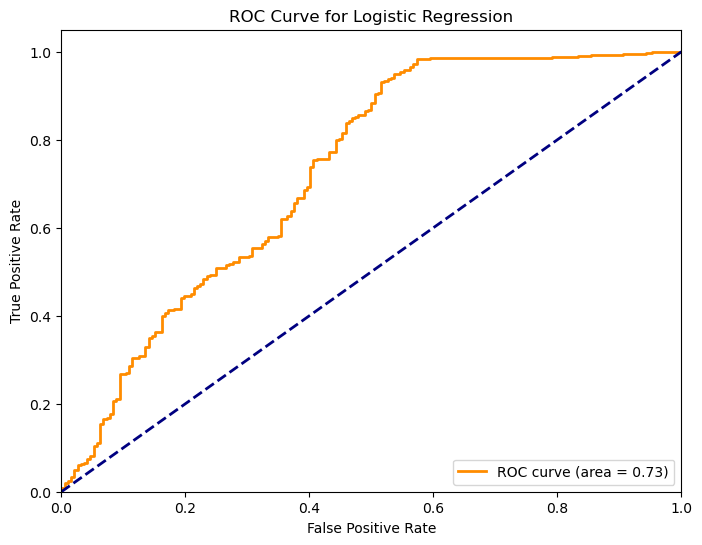

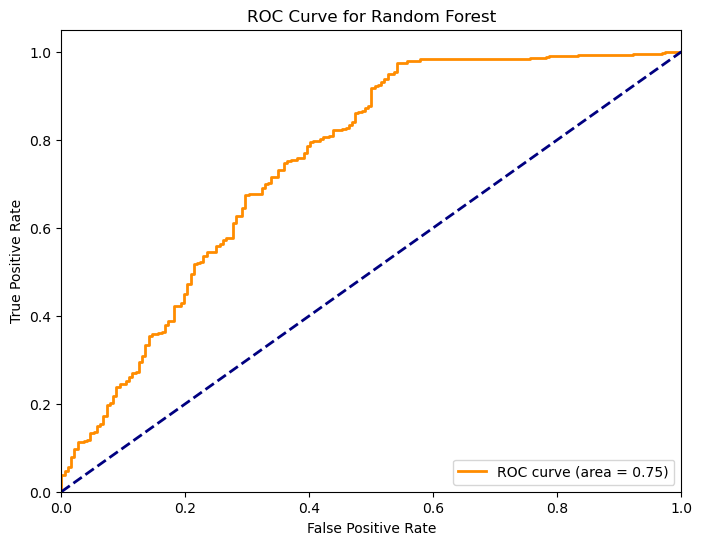

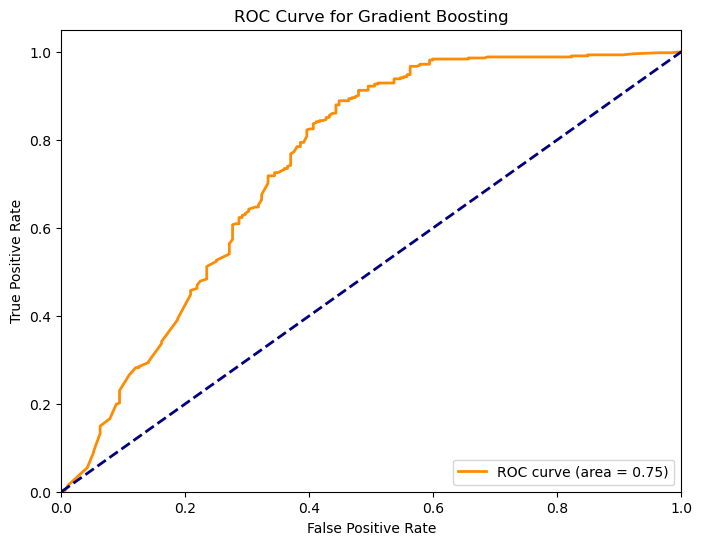

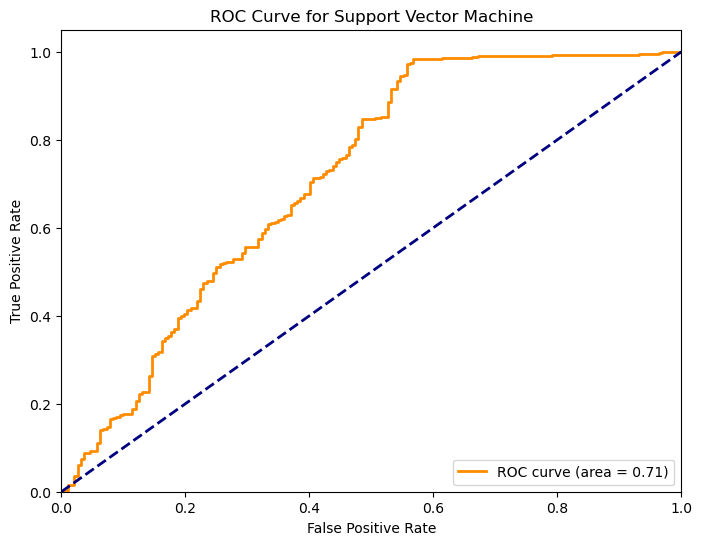

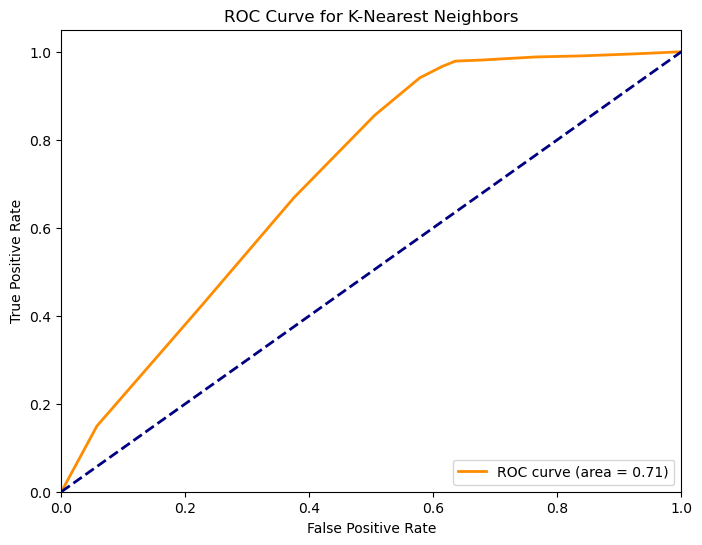

In [49]:
from sklearn.metrics import roc_curve, auc

for model_info in best_models:
    model = model_info['estimator']
    model_name = model_info['model']
    
    try:
        y_scores = cross_val_predict(model, X_train_pca, y, cv=5, method='predict_proba')
        y_scores = y_scores[:, 1]
    except AttributeError:
        y_scores = cross_val_predict(model, X_train_pca, y, cv=5, method='decision_function')
    
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# 5). Feature Engineering

In [50]:
data.head(5)

,Gender,Married,Dependents,Education,TotalIncome,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849.0,0,128.0,360.0,1.0,2,1
1,1,1,1,0,6091.0,0,128.0,360.0,1.0,0,0
2,1,1,0,0,3000.0,1,66.0,360.0,1.0,2,1
3,1,1,0,1,4941.0,0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000.0,0,141.0,360.0,1.0,2,1


In [96]:
data['Income_per_Dependent'] = data['TotalIncome'] / (data['Dependents'] + 1)
data['Loan_Income_Ratio'] = data['LoanAmount'] / data['TotalIncome']
data['EMI'] = data['LoanAmount'] / data['Loan_Amount_Term']
data['Credit_History_Income'] = data['Credit_History'] * data['TotalIncome']
data.head(2)

,Gender,Married,Dependents,Education,TotalIncome,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_per_Dependent,Loan_Income_Ratio,EMI,Credit_History_Income
0,1,0,0,0,5849.0,0,128.0,360.0,1.0,2,1,5849.0,0.021884,0.355556,5849.0
1,1,1,1,0,6091.0,0,128.0,360.0,1.0,0,0,3045.5,0.021015,0.355556,6091.0


In [97]:
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

In [98]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
data.isnull().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
TotalIncome              0
Self_Employed            0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
Income_per_Dependent     0
Loan_Income_Ratio        0
EMI                      0
Credit_History_Income    0
dtype: int64

In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2)
X_test_scaled = scaler.transform(X_test_2)

In [101]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [102]:
pca = PCA(n_components=10)
X_train_pca_2 = pca.fit_transform(X_train_poly)
X_test_pca_2 = pca.transform(X_test_poly)

# 6). Model Building 2
#### Logistic Regression
#### Random Forest
#### Gradient Boosting
#### Support Vector Machines
#### K- Nearest Neighbors
#### Decision Trees
#### Naive Bayes
#### Ensemble methods such as - Bagging & Stacking

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

models_2 = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['lbfgs', 'liblinear'],
            'multi_class': ['auto']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [1, 5, 10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30, 40],
            'min_samples_split': [2, 5, 10, 15]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7, 9]
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'Bagging Classifier': {
        'model': BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_samples': [0.5, 0.7, 1.0],
            'max_features': [0.5, 0.7, 1.0]
        }
    },
    'Stacking Classifier': {
        'model': StackingClassifier(estimators=[
            ('lr', LogisticRegression()),
            ('svc', SVC()),
            ('rf', RandomForestClassifier(random_state=42))
        ], final_estimator=LogisticRegression()),
        'params': {}
    }
}

In [60]:
best_models_2 = []
for model_name, mp in models_2.items():
    print(f"Running GridSearchCV for {model_name}...")
    if model_name == 'Support Vector Machine':
        clf = RandomizedSearchCV(mp['model'], mp['params'], n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    else:
        clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    
    clf.fit(X_train_pca_2, y_train_2)
    
    print(f"Best parameters for {model_name}: {clf.best_params_}")
    print(f"Best cross-validation score for {model_name}: {clf.best_score_}")
    
    best_models_2.append({
        'model': model_name,
        'best_params': clf.best_params_,
        'best_score': clf.best_score_,
        'estimator': clf.best_estimator_
    })

Running GridSearchCV for Logistic Regression...


C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters for Logistic Regression: {'C': 0.1, 'multi_class': 'auto', 'solver': 'lbfgs'}
Best cross-validation score for Logistic Regression: 0.8166151309008451
Running GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.8186147186147185
Running GridSearchCV for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation score for Gradient Boosting: 0.8145743145743147
Running GridSearchCV for Support Vector Machine...
Best parameters for Support Vector Machine: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Best cross-validation score for Support Vector Machine: 0.8166357452071737
Running GridSearchCV for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation score for K-Nearest Neighbors: 0.81253

# 6.1). Score & Truth Table for Model 2

C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio


Model: Logistic Regression
Accuracy: 0.8167006109979633
Confusion Matrix:
[[ 68  81]
 [  9 333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.46      0.60       149
           1       0.80      0.97      0.88       342

    accuracy                           0.82       491
   macro avg       0.84      0.72      0.74       491
weighted avg       0.83      0.82      0.80       491



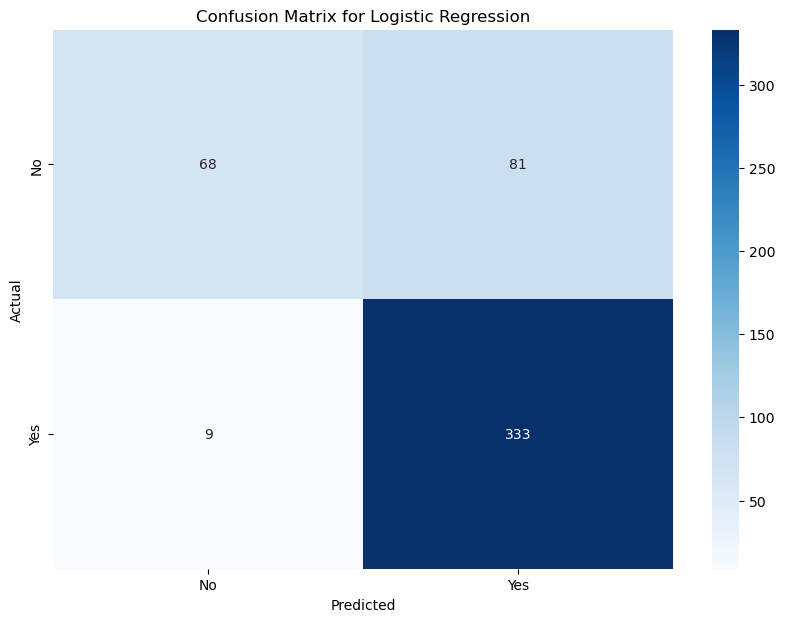


Model: Random Forest
Accuracy: 0.8187372708757638
Confusion Matrix:
[[ 75  74]
 [ 15 327]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.50      0.63       149
           1       0.82      0.96      0.88       342

    accuracy                           0.82       491
   macro avg       0.82      0.73      0.75       491
weighted avg       0.82      0.82      0.80       491



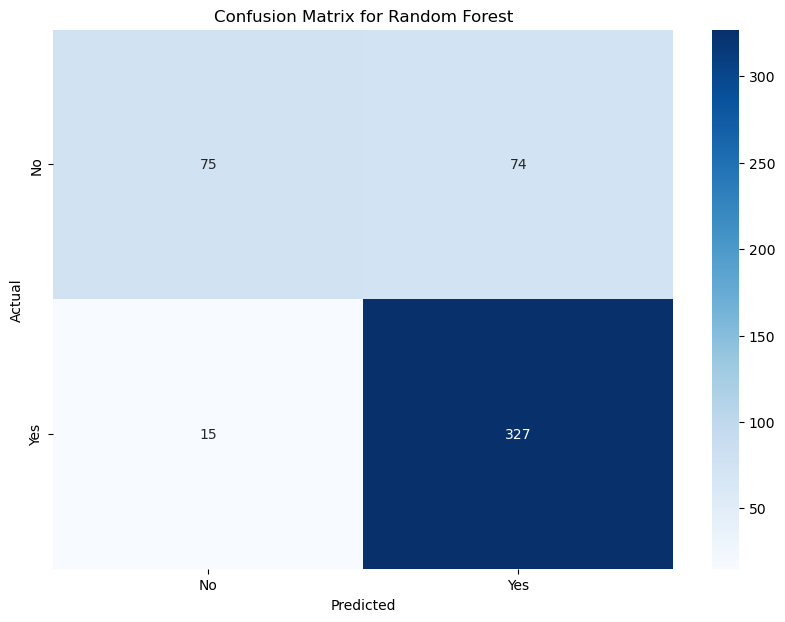


Model: Gradient Boosting
Accuracy: 0.814663951120163
Confusion Matrix:
[[ 66  83]
 [  8 334]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.44      0.59       149
           1       0.80      0.98      0.88       342

    accuracy                           0.81       491
   macro avg       0.85      0.71      0.74       491
weighted avg       0.83      0.81      0.79       491



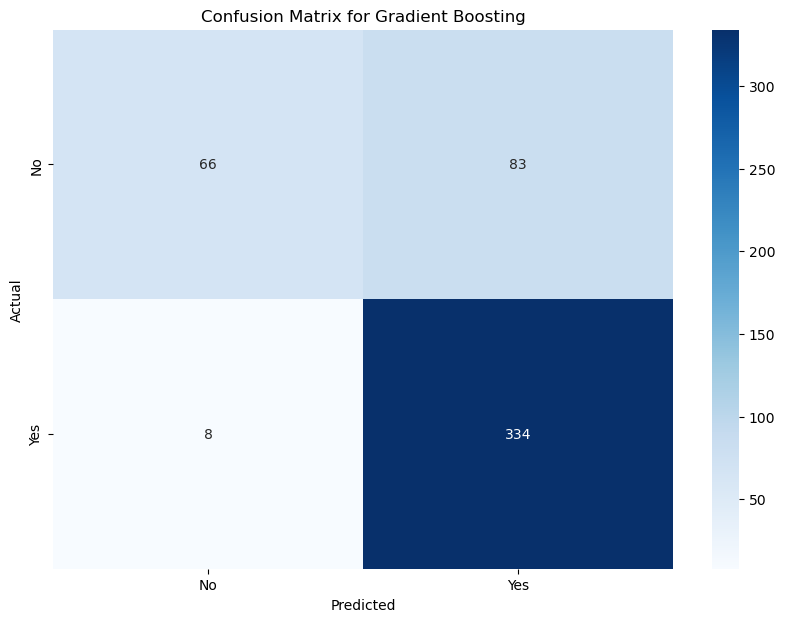


Model: Support Vector Machine
Accuracy: 0.8167006109979633
Confusion Matrix:
[[ 66  83]
 [  7 335]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59       149
           1       0.80      0.98      0.88       342

    accuracy                           0.82       491
   macro avg       0.85      0.71      0.74       491
weighted avg       0.83      0.82      0.79       491



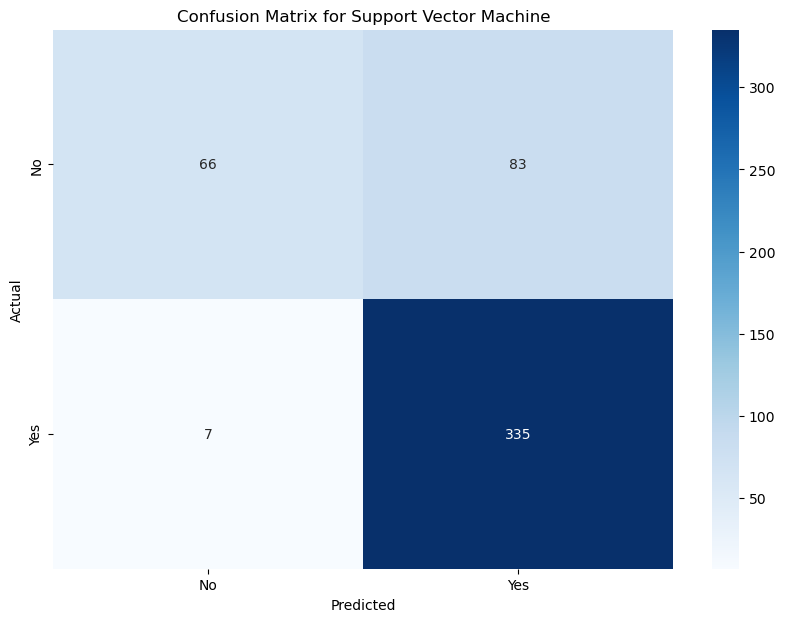


Model: K-Nearest Neighbors
Accuracy: 0.8126272912423625
Confusion Matrix:
[[ 68  81]
 [ 11 331]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.46      0.60       149
           1       0.80      0.97      0.88       342

    accuracy                           0.81       491
   macro avg       0.83      0.71      0.74       491
weighted avg       0.82      0.81      0.79       491



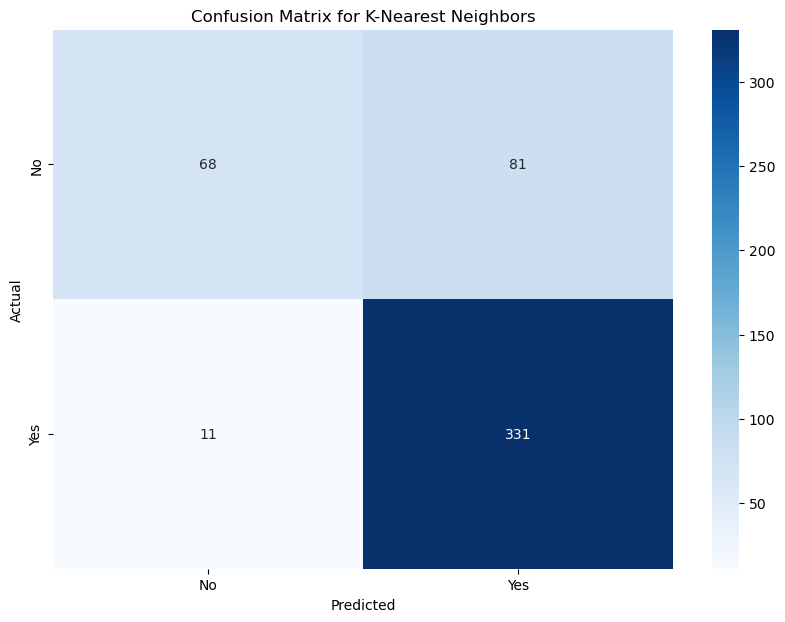


Model: Decision Tree
Accuracy: 0.7617107942973523
Confusion Matrix:
[[ 81  68]
 [ 49 293]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.54      0.58       149
           1       0.81      0.86      0.83       342

    accuracy                           0.76       491
   macro avg       0.72      0.70      0.71       491
weighted avg       0.75      0.76      0.76       491



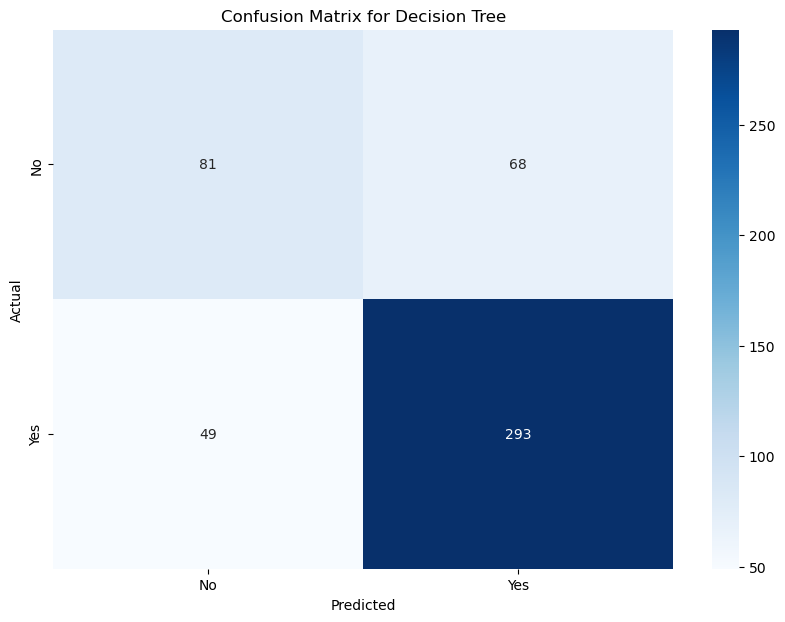


Model: Naive Bayes
Accuracy: 0.7515274949083504
Confusion Matrix:
[[ 78  71]
 [ 51 291]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       149
           1       0.80      0.85      0.83       342

    accuracy                           0.75       491
   macro avg       0.70      0.69      0.69       491
weighted avg       0.74      0.75      0.75       491



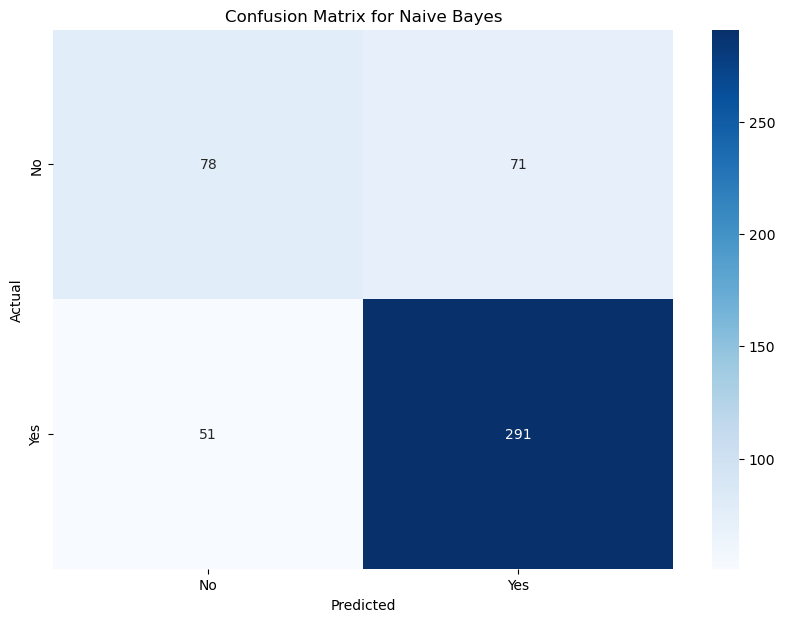


Model: Bagging Classifier
Accuracy: 0.824847250509165
Confusion Matrix:
[[ 74  75]
 [ 11 331]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.50      0.63       149
           1       0.82      0.97      0.89       342

    accuracy                           0.82       491
   macro avg       0.84      0.73      0.76       491
weighted avg       0.83      0.82      0.81       491



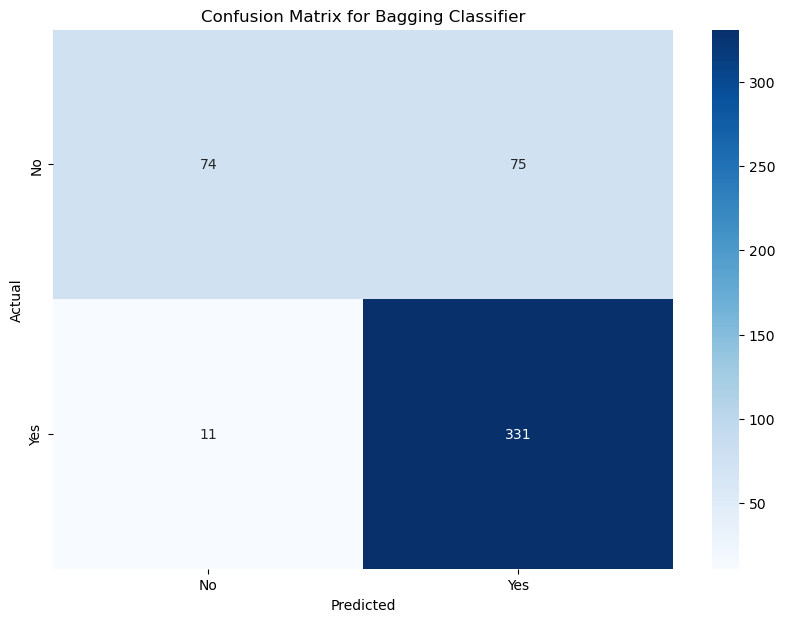


Model: Stacking Classifier
Accuracy: 0.8187372708757638
Confusion Matrix:
[[ 71  78]
 [ 11 331]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.48      0.61       149
           1       0.81      0.97      0.88       342

    accuracy                           0.82       491
   macro avg       0.84      0.72      0.75       491
weighted avg       0.83      0.82      0.80       491



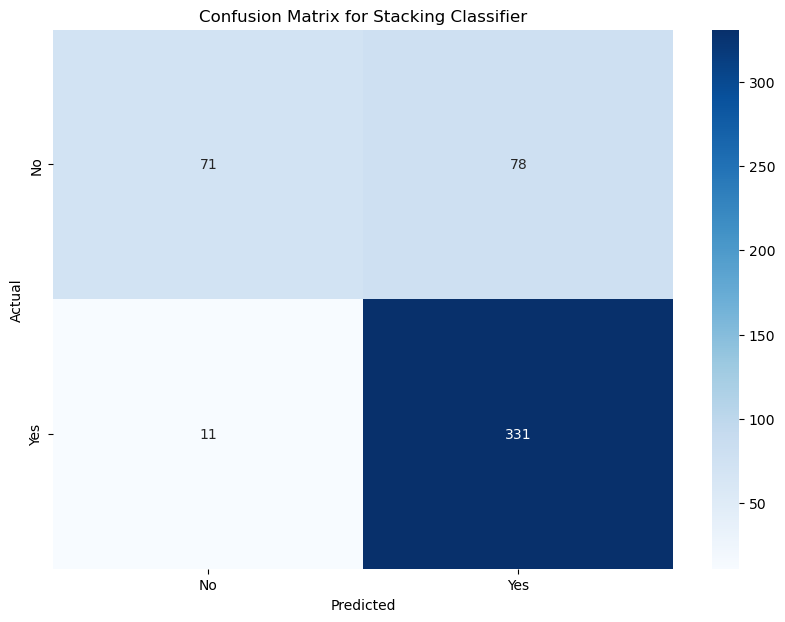

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

for model_info in best_models_2:
    model = model_info['estimator']
    model_name = model_info['model']
    
    # Use cross_val_predict to get predictions
    y_train_pred = cross_val_predict(model, X_train_pca_2, y_train_2, cv=5)
    
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_train_2, y_train_pred)}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_train_2, y_train_pred)
    print(f"Confusion Matrix:\n{conf_matrix}")
    
    # Classification Report
    class_report = classification_report(y_train_2, y_train_pred)
    print(f"Classification Report:\n{class_report}")
    
    # Visualize Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

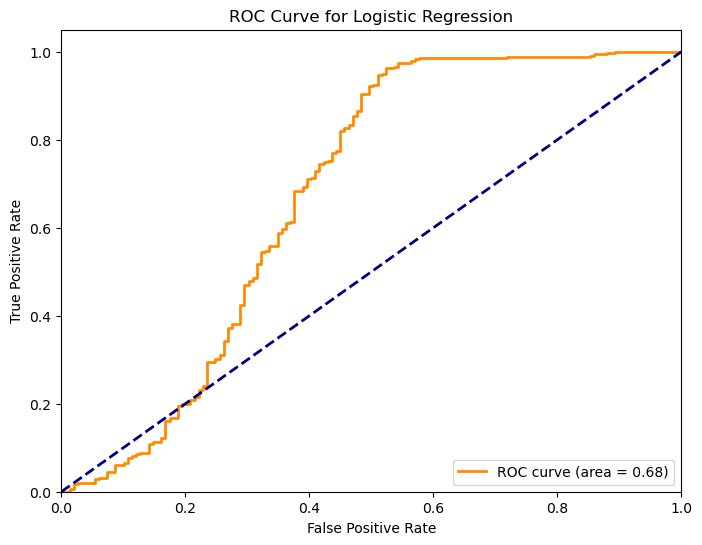

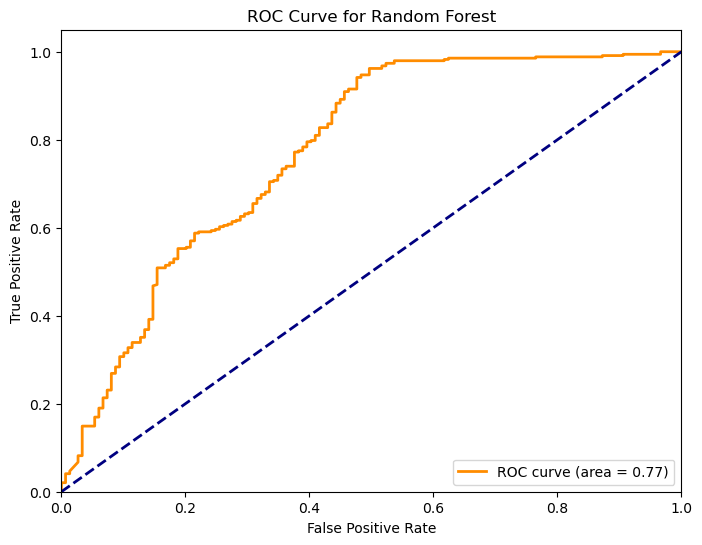

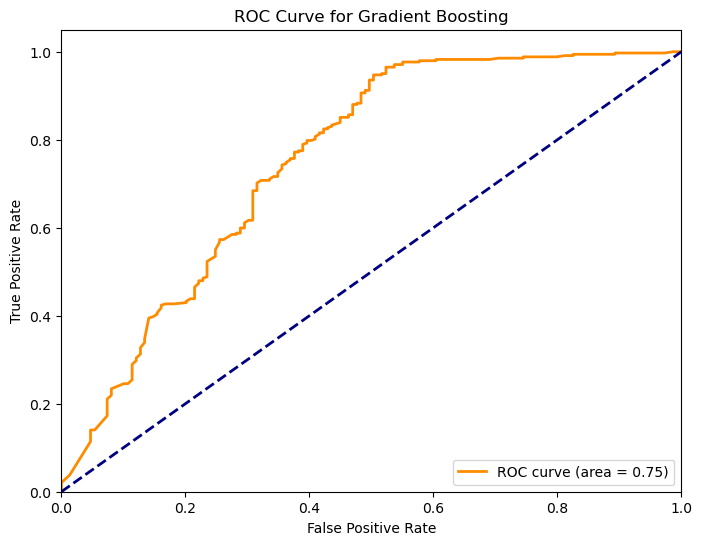

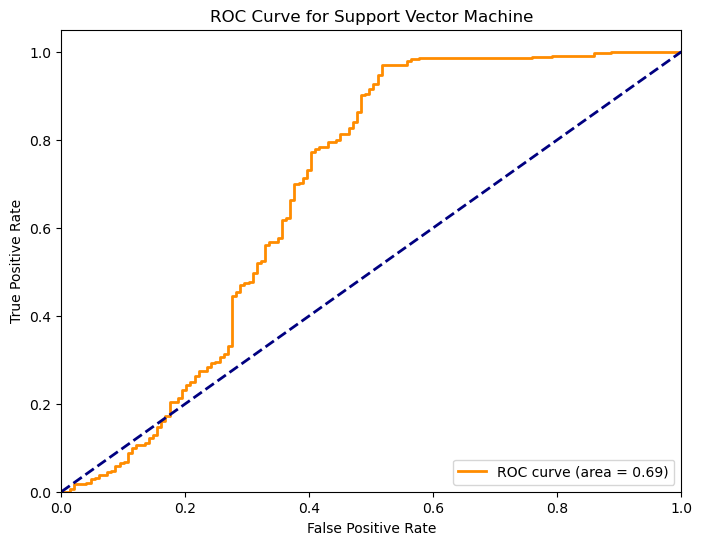

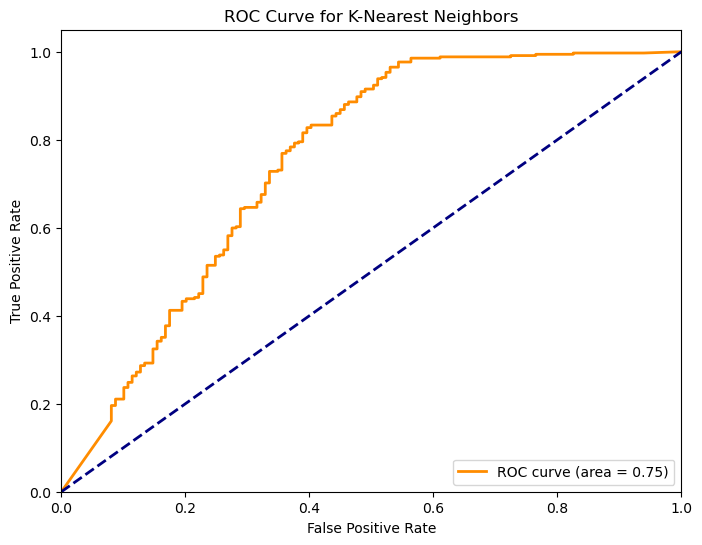

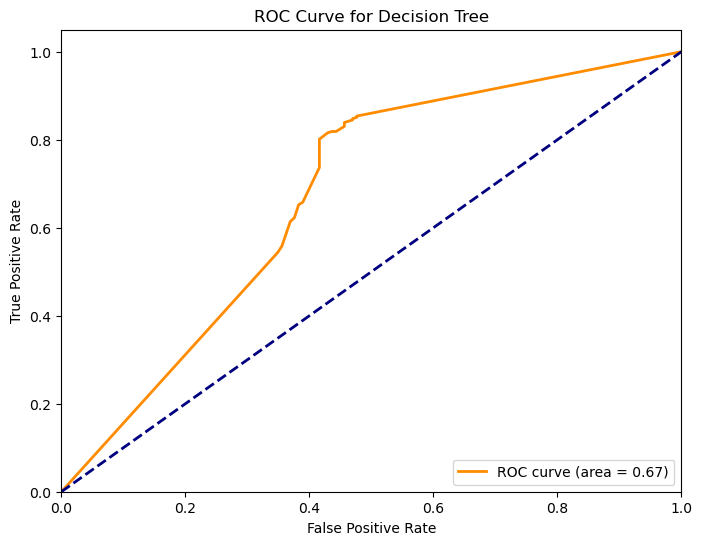

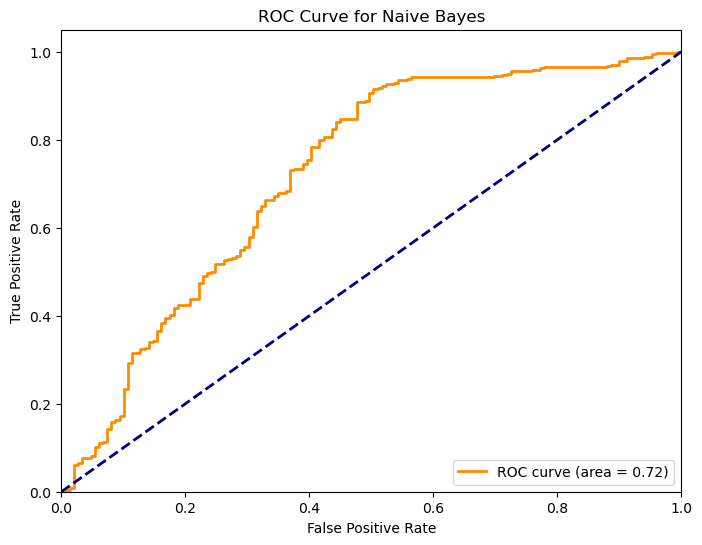

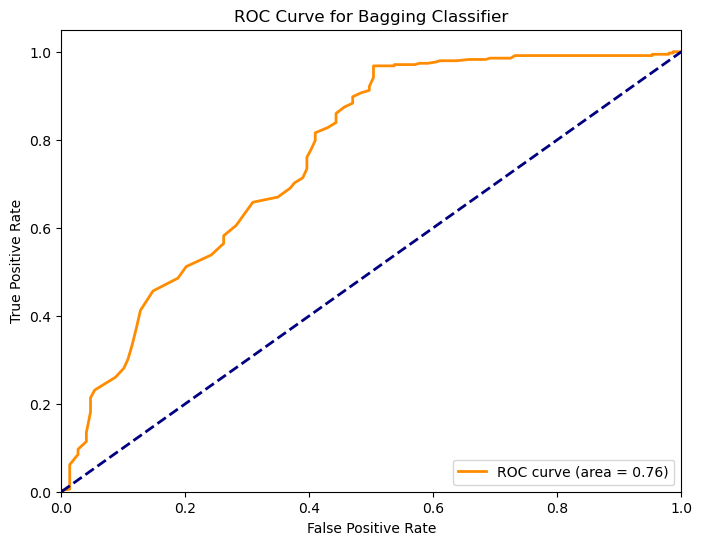

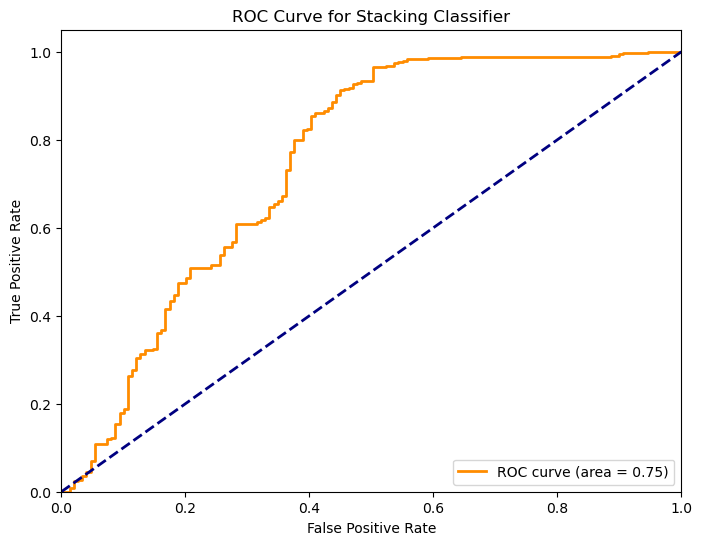

In [62]:
from sklearn.metrics import roc_curve, auc

for model_info in best_models_2:
    model = model_info['estimator']
    model_name = model_info['model']
    
    try:
        y_scores = cross_val_predict(model, X_train_pca_2, y_train_2, cv=5, method='predict_proba')
        y_scores = y_scores[:, 1]
    except AttributeError:
        y_scores = cross_val_predict(model, X_train_pca_2, y_train_2, cv=5, method='decision_function')
    
    fpr, tpr, _ = roc_curve(y_train_2, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [77]:
best_model_info = max(best_models_2, key=lambda x: x['best_score'])
best_model = best_model_info['estimator']
y_test_pred = best_model.predict(X_test_pca_2)

In [79]:
import tensorflow as tf
best_model = tf.keras.models.load_model('best_model.h5')
y_pred_proba = best_model.predict(X_test_pca_2)
y_pred = (y_pred_proba > 0.5).astype(int)



4/4 [==============================] - 0s 5ms/step


In [80]:
test_auc = roc_auc_score(y_test_2, y_pred_proba)
test_accuracy = accuracy_score(y_test_2, y_pred)

In [81]:
print(f'Test AUC: {test_auc:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test AUC: 0.4773
Test Accuracy: 65.04%


In [82]:
conf_matrix = confusion_matrix(y_test_2, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[ 0 43]
 [ 0 80]]


In [83]:
class_report = classification_report(y_test_2, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



C:\Users\91813\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91813\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


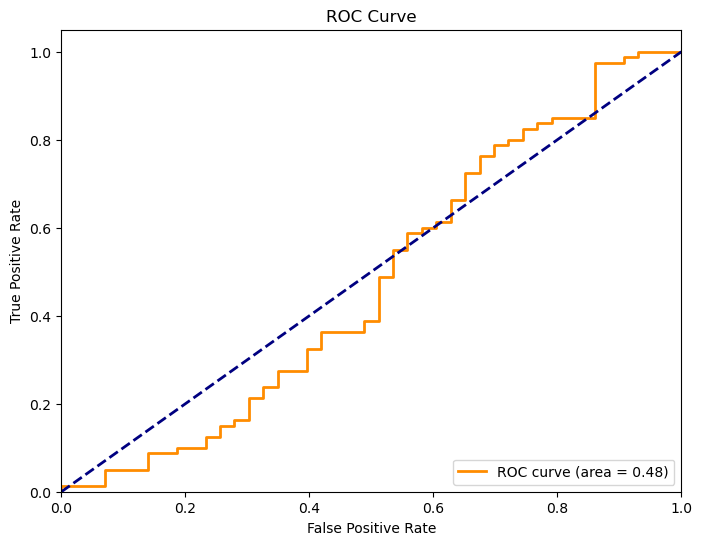

In [84]:
fpr, tpr, _ = roc_curve(y_test_2, y_pred_proba)
roc_auc = roc_auc_score(y_test_2, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Neural Network

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [112]:
X_train, X_val, y_train, y_val = train_test_split(X_train_pca_2, y_train_2, test_size=0.2, random_state=42)

In [113]:
class AUCCallback(Callback):
    def __init__(self, validation_data=()):
        super(Callback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if self.validation_data:
            x_val, y_val = self.validation_data
            y_pred = self.model.predict(x_val)
            val_auc = roc_auc_score(y_val, y_pred)
            logs['val_auc'] = val_auc
            print(f' - val_auc: {val_auc:.4f}')

In [114]:
def create_model(input_dim, optimizer='adam', init='glorot_uniform', dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, kernel_initializer=init, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, kernel_initializer=init, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [115]:
model = create_model(input_dim=X_train.shape[1])

In [116]:
auc_callback = AUCCallback(validation_data=(X_val, y_val))

In [117]:
callbacks = [
    auc_callback,
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
]

In [118]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step- loss: 0.8182 - accuracy: 0.25
 - val_auc: 0.5675
13/13 [==============================] - 2s 47ms/step - loss: 0.6825 - accuracy: 0.6199 - val_loss: 0.6283 - val_accuracy: 0.6768 - val_auc: 0.5675 - lr: 0.0010
Epoch 2/100
 1/13 [=>............................] - ETA: 0s - loss: 0.5628 - accuracy: 0.8438

C:\Users\91813\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 6ms/step
 - val_auc: 0.6359
13/13 [==============================] - 0s 19ms/step - loss: 0.5850 - accuracy: 0.7602 - val_loss: 0.5924 - val_accuracy: 0.7172 - val_auc: 0.6359 - lr: 0.0010
Epoch 3/100
 1/13 [=>............................] - ETA: 0s - loss: 0.5198 - accuracy: 0.8438

C:\Users\91813\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 2ms/step
 - val_auc: 0.6680
13/13 [==============================] - 0s 21ms/step - loss: 0.5204 - accuracy: 0.8138 - val_loss: 0.5881 - val_accuracy: 0.7172 - val_auc: 0.6680 - lr: 0.0010
Epoch 4/100
 1/13 [=>............................] - ETA: 0s - loss: 0.4799 - accuracy: 0.8438

C:\Users\91813\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 6ms/step
 - val_auc: 0.6524
13/13 [==============================] - 0s 22ms/step - loss: 0.4791 - accuracy: 0.8342 - val_loss: 0.6219 - val_accuracy: 0.7273 - val_auc: 0.6524 - lr: 0.0010
Epoch 5/100
4/4 [==============================] - 0s 3ms/step loss: 0.5642 - accuracy: 0.75
 - val_auc: 0.6446
13/13 [==============================] - 0s 20ms/step - loss: 0.4536 - accuracy: 0.8367 - val_loss: 0.6470 - val_accuracy: 0.7273 - val_auc: 0.6446 - lr: 0.0010
Epoch 6/100
4/4 [==============================] - 0s 2ms/step loss: 0.7029 - accuracy: 0.71
 - val_auc: 0.6244
13/13 [==============================] - 0s 19ms/step - loss: 0.4537 - accuracy: 0.8342 - val_loss: 0.6529 - val_accuracy: 0.7273 - val_auc: 0.6244 - lr: 0.0010
Epoch 7/100
4/4 [==============================] - 0s 3ms/step loss: 0.5717 - accuracy: 0.68
 - val_auc: 0.6359
13/13 [==============================] - 0s 20ms/step - loss: 0.4293 - accuracy: 0.8316 - val_loss: 0.6461 - va

In [119]:
best_model = tf.keras.models.load_model('best_model.h5')
y_pred_proba = best_model.predict(X_test_pca_2)
y_pred = (y_pred_proba > 0.5).astype(int)

4/4 [==============================] - 0s 3ms/step


In [120]:
test_auc = roc_auc_score(y_test_2, y_pred_proba)
test_accuracy = accuracy_score(y_test_2, y_pred)

In [121]:
print(f'Test AUC: {test_auc:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test AUC: 0.7657
Test Accuracy: 77.24%


In [123]:
conf_matrix = confusion_matrix(y_test_2, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
class_report = classification_report(y_test_2, y_pred)
print(f"Classification Report:\n{class_report}")

Confusion Matrix:
[[19 24]
 [ 4 76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



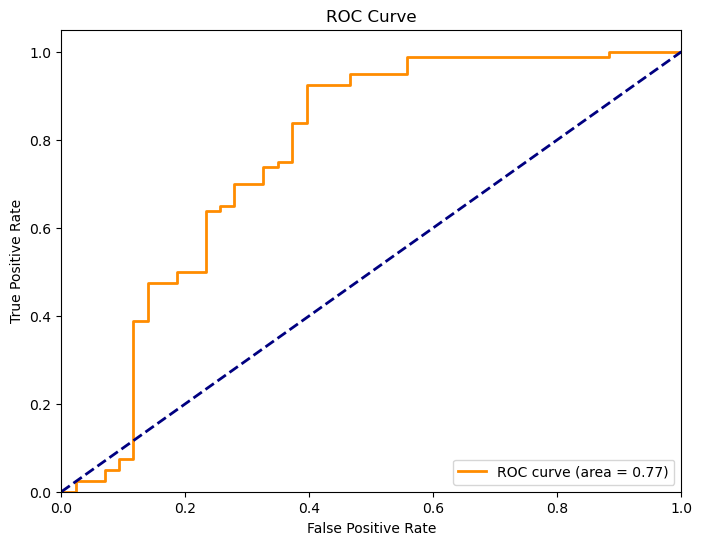

In [124]:
fpr, tpr, _ = roc_curve(y_test_2, y_pred_proba)
roc_auc = roc_auc_score(y_test_2, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# since TEST ACCURACY of NN model : 77.24% and that of models among (Logistic Regression, Random Forest, Gradient Boosting, SVM, KNN, Decision Tree, Naive Bayes, Ensemble methods like Bagging & Stacking) has TEST ACCURACY : 65.04%
# NN model is chosen

In [134]:
from tensorflow.keras.models import load_model

loaded_model = load_model('path_to_save_model/nn.h5')

X_test = df
predictions = loaded_model.predict(X_test)

print(predictions)

12/12 [==============================] - 0s 3ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]